In [2]:
import os
import pandas as pd
import nltk
import gensim
import timeit
import numpy as np
from gensim import corpora, models, similarities

In [3]:
import string
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.DEBUG)
from urllib.request import urlopen
import nltk, re, pprint
from nltk import word_tokenize
from nltk import tokenize

In [3]:
# Load Word2Vec Model
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

2017-04-01 16:05:59,085 : INFO : loading projection weights from GoogleNews-vectors-negative300.bin
2017-04-01 16:07:23,970 : INFO : loaded (3000000, 300) matrix from GoogleNews-vectors-negative300.bin


## Question 1

In [4]:
# Store similarities between test words
similarities = []

similarities.append([('France','England'), model.similarity('French','English')])
similarities.append([('smaller', 'bigger'), model.similarity('smaller', 'bigger')])
similarities.append([('England', 'London'), model.similarity('England', 'London')])
similarities.append([('France', 'Rocket'), model.similarity('France', 'Rocket')])
similarities.append([('big', 'bigger'), model.similarity('big', 'bigger')])




In [5]:
similarities

[[('France', 'England'), 0.44199719987068264],
 [('smaller', 'bigger'), 0.73022720873313751],
 [('England', 'London'), 0.43992858122481965],
 [('France', 'Rocket'), 0.071141743677413757],
 [('big', 'bigger'), 0.68423855988927385]]

## Question 2: Extract Vector Representations

In [6]:
similarities_dict = dict(similarities)

#(France,  England, smaller, bigger, rocket, big) 

In [7]:
unique = [[x for x in key] for key in similarities_dict.keys()]
unique = [item for sublist in unique for item in sublist]

In [8]:
unique

['France',
 'Rocket',
 'France',
 'England',
 'England',
 'London',
 'smaller',
 'bigger',
 'big',
 'bigger']

In [9]:
unique_vectors = [model[item] for item in unique]

In [10]:
words_vec = zip(unique, unique_vectors)

In [11]:
words_vec = list(words_vec)

In [12]:
words_vec

[('France', array([  4.85839844e-02,   7.86132812e-02,   3.24218750e-01,
           3.49121094e-02,   7.71484375e-02,   3.54003906e-02,
          -1.25976562e-01,  -3.86718750e-01,  -1.31835938e-01,
           2.91748047e-02,  -1.44531250e-01,  -1.42578125e-01,
           1.79687500e-01,  -2.75390625e-01,  -1.65039062e-01,
           9.32617188e-02,   1.17187500e-01,   1.82617188e-01,
           6.10351562e-02,   1.14257812e-01,   1.82617188e-01,
          -1.16699219e-01,  -3.24707031e-02,  -7.56835938e-02,
           9.64355469e-03,   8.59375000e-02,  -2.85156250e-01,
          -2.55859375e-01,   3.01513672e-02,   2.16796875e-01,
          -1.00097656e-01,   2.85644531e-02,  -2.81250000e-01,
          -8.39843750e-02,  -2.02636719e-02,  -1.96289062e-01,
          -4.78515625e-02,   7.12890625e-02,  -1.42578125e-01,
          -1.13525391e-02,   1.16210938e-01,   7.22656250e-02,
           1.47460938e-01,   1.50390625e-01,   1.40625000e-01,
           2.47070312e-01,  -1.69921875e-01, 

## Question 3

In [13]:
mag_dict = {}
for item in words_vec:
#     print(item[1])
    mag_dict[item[0]] = np.linalg.norm(item[1])

In [14]:
mag_dict

{'England': 2.7783706,
 'France': 2.716706,
 'London': 2.6512325,
 'Rocket': 2.9870281,
 'big': 2.2165327,
 'bigger': 2.6227472,
 'smaller': 2.4209383}

In [15]:
print(
'France - England = {}'.format(mag_dict['France'] - mag_dict['England']),
'smaller - bigger = {}'.format(mag_dict['smaller'] - mag_dict['bigger']),
'England - London = {}'.format(mag_dict['England'] - mag_dict['London']),
'France - Rocket = {}'.format(mag_dict['France'] - mag_dict['Rocket']),
'big - bigger = {}'.format(mag_dict['big'] - mag_dict['bigger']),
sep='\n')


France - England = -0.061664581298828125
smaller - bigger = -0.20180892944335938
England - London = 0.1271381378173828
France - Rocket = -0.2703220844268799
big - bigger = -0.40621447563171387


### 3.1

Q: Do the magnitudes of the vectors matter? Justify your answer?:

A: The magnitudes do matter for performing Vector composition to find analogous relationships between other words. They are needed in addition to cosine distance to do vector composition.





## Question 4

### example: England, London
Magnitudes: 'England': 2.7783706, 'London': 2.6512325,  
Difference: England - London = 0.1271381378173828  
Similarity: ('England', 'London'), 0.43992858122481965  
  
The magnitudes are the computed norms of the vectors. In this example, the small difference between the computed norms for 'London' and 'England' shows that the representation of these two words has a similar magnitude. The Cosine similarity between any two example words is the angular difference in the representation space between the vectors of those words. The ammount of similarity is inverseley proportional to the ammount of of cosine distance and magnitude between two words.




## Question 5

In [16]:
# 5.1
model.most_similar(positive=['King'], negative=['Queen'], topn=2)

2017-04-01 16:11:25,969 : INFO : precomputing L2-norms of word weight vectors


[('Bon_Jovi_Canillas', 0.36876532435417175), ('Lomax', 0.36203983426094055)]

In [17]:
# 5.2
model.most_similar(positive=['bigger','small'], negative=['big'], topn=2)

[('larger', 0.7402471899986267), ('smaller', 0.732999324798584)]

## Question 6

In [19]:
model.most_similar(positive=['comedy',], negative=['tragedy'], topn=2)

[('comedies', 0.48853954672813416), ('sketch_comedy', 0.4777592420578003)]

## Question 7  

Skip Gram uses the log loss to compare probability distributions. It minimizes the negative log difference between the probabilities of the output vectors.

# Part 2

## 2.A

In [1]:
# import inaugural address corpus
from nltk.corpus import inaugural

In [25]:
# number of words
len(inaugural.words())
raw = ' '.join(inaugural.words())

In [1]:
# Get text
url = "http://www.gutenberg.org/cache/epub/2489/pg2489.txt" ## Moby Dick
resp = urlopen(url)
raw = resp.read().decode('utf8')

NameError: name 'urlopen' is not defined

In [5]:
# Token setting
pattern = r'''(?x)  # set flag to allow verbose regexps
(?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
|\w+(?:[-']\w+)*    # words with optional internal hyphens
|\$?\d+(?:\.\d+)?   # currency, e.g. $12.80 
|\.\.\.             # elipses
|[.,;"'?()-_`]      # these are separate tokens
'''

In [6]:
# Tokenize Text
firstlook = tokenize.sent_tokenize(raw)
tokenized_raw =" ".join( nltk.regexp_tokenize(raw,pattern))
tokenized_raw=tokenize.sent_tokenize(tokenized_raw)

In [7]:
firstlook[:10]

['\ufeff**The Project Gutenberg Etext of Moby Dick, by Herman Melville**\r\n#3 in our series by Herman Melville\r\n\r\nThis work is still under construction, email me if you can help.',
 'Copyright laws are changing all over the world, be sure to check\r\nthe copyright laws for your country before posting these files!!',
 'Please take a look at the important information in this header.',
 'We encourage you to keep this file on your own disk, keeping an\r\nelectronic path open for the next readers.',
 'Do not remove this.',
 '**Welcome To The World of Free Plain Vanilla Electronic Texts**\r\n\r\n**Etexts Readable By Both Humans and By Computers, Since 1971**\r\n\r\n*These Etexts Prepared By Hundreds of Volunteers and Donations*\r\n\r\nInformation on contacting Project Gutenberg to get Etexts, and\r\nfurther information is included below.',
 'We need your donations.',
 'Title:  Moby Dick; or The Whale\r\n\r\nAuthor:  Herman Melville\r\n\r\nJanuary, 2001  [Etext #2489]\r\n[Date last updat

In [8]:
nopunct=[]
for sent in tokenized_raw:
        a = [w for w in sent.split() if w not in string.punctuation]
        nopunct.append(" ".join(a))

#word list
tok_corp = [nltk.word_tokenize(sent) for sent in nopunct]

In [9]:
# Unique Words in text
combined_list = [" ".join(w) for w in tok_corp]
unique_list = []
for sent in combined_list:
    unique_list.append([w for w in sent.split()])
unique_list=list(set([item for sublist in unique_list for item in sublist]))

In [10]:
# Load Word2Vec Model
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

2017-04-12 15:13:53,248 : INFO : loading projection weights from GoogleNews-vectors-negative300.bin
2017-04-12 15:15:19,790 : INFO : loaded (3000000, 300) matrix from GoogleNews-vectors-negative300.bin


In [11]:
# training gensim on corpus
model = gensim.models.Word2Vec(tok_corp, min_count=1, size = 16, window=5)

2017-04-12 15:15:19,799 : DEBUG : Fast version of gensim.models.word2vec is being used
2017-04-12 15:15:19,803 : INFO : collecting all words and their counts
2017-04-12 15:15:19,804 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-04-12 15:15:19,890 : INFO : collected 20521 word types from a corpus of 218003 raw words and 8389 sentences
2017-04-12 15:15:19,891 : INFO : Loading a fresh vocabulary
2017-04-12 15:15:20,002 : INFO : min_count=1 retains 20521 unique words (100% of original 20521, drops 0)
2017-04-12 15:15:20,004 : INFO : min_count=1 leaves 218003 word corpus (100% of original 218003, drops 0)
2017-04-12 15:15:20,132 : INFO : deleting the raw counts dictionary of 20521 items
2017-04-12 15:15:20,134 : INFO : sample=0.001 downsamples 47 most-common words
2017-04-12 15:15:20,135 : INFO : downsampling leaves estimated 168685 word corpus (77.4% of prior 218003)
2017-04-12 15:15:20,136 : INFO : estimated required memory for 20521 words and 16 dimensio

In [13]:
## List of Vectors for unique words in text
vectors_list = []
for word in unique_list:
    vectors_list.append(model[word])

## 2.B

In [14]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [15]:
# Lets dim reduce the 16 dimension vectors to 2dimensions to vizualise the dataset 
data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(vectors_list)


[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 20521
[t-SNE] Computed conditional probabilities for sample 2000 / 20521
[t-SNE] Computed conditional probabilities for sample 3000 / 20521
[t-SNE] Computed conditional probabilities for sample 4000 / 20521
[t-SNE] Computed conditional probabilities for sample 5000 / 20521
[t-SNE] Computed conditional probabilities for sample 6000 / 20521
[t-SNE] Computed conditional probabilities for sample 7000 / 20521
[t-SNE] Computed conditional probabilities for sample 8000 / 20521
[t-SNE] Computed conditional probabilities for sample 9000 / 20521
[t-SNE] Computed conditional probabilities for sample 10000 / 20521
[t-SNE] Computed conditional probabilities for sample 11000 / 20521
[t-SNE] Computed conditional probabilities for sample 12000 / 20521
[t-SNE] Computed conditional probabilities for sample 13000 / 20521
[t-SNE] Computed conditional probabilities

In [25]:
# len(data_embed)
len(unique_list)

20521

In [19]:
len(data_embed)

20521

In [22]:
data = pd.DataFrame(data_embed)

In [27]:
data['word'] = unique_list

In [28]:
from matplotlib import pyplot as plt

In [31]:
data.to_csv('tsne_words.csv')

In [37]:
x_axis = data_embed[:,0]
y_axis = data_embed[:,1]

In [38]:
plt.scatter(x_axis, y_axis, s=1)

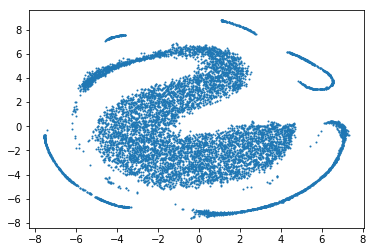

In [39]:
plt.show()

## Extra Credit

In [50]:
model.most_similar(positive=['land'], topn=2)

[('political', 0.9996384978294373), ('most', 0.9995706677436829)]